Some insights of the boxoffice evolution in US

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# import data worldwide (US perspective)
# source: boxofficemojo webscrapping
data = "../data/"
file = "world_bo.csv"

bo_world = pd.read_csv(data + file)
# drop column "Unnamed: 0"
bo_world = bo_world.drop(columns=["Unnamed: 0"])

# check data
bo_world

,Title,Year,Worldwide,Domestic
0,Mission: Impossible II,2000,546388108,215409889.0
1,Gladiator,2000,460583960,187705427.0
2,Cast Away,2000,429632142,233632142.0
3,What Women Want,2000,374111707,182811707.0
4,Dinosaur,2000,349822765,137748063.0
...,...,...,...,...
12495,Jimi Hendrix Electric Church,2019,1818,NaN
12496,Game Day,2019,1624,1624.0
12497,The Hours and Times,2019,1273,1273.0
12498,The Untold Story,2019,790,790.0


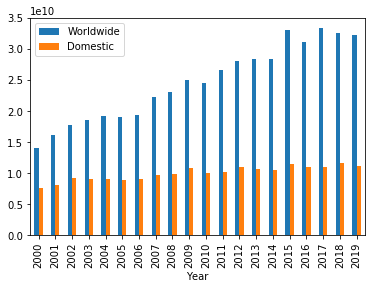

In [3]:
# Check evolution of the box office in the last 20 years
bo_world.groupby("Year").sum().plot.bar();

In [4]:
# create variable
bo_world_yearly = bo_world.groupby("Year").sum()

# calculate the increase
increase = round((bo_world_yearly.iloc[19]["Worldwide"] - bo_world_yearly.iloc[0]["Worldwide"])/bo_world_yearly.iloc[0]["Worldwide"],2)

million = 1000000

# print Worldwide values
print(int(bo_world_yearly.iloc[0]["Worldwide"]/million))
print(int(bo_world_yearly.iloc[19]["Worldwide"]/million))
print(increase*100, "%")

# best year
print(bo_world_yearly["Worldwide"].idxmax(axis=1))
print(int(bo_world_yearly["Worldwide"].max()/million))

14011
32330
131.0 %
2017
33363


In [5]:
# print Domestic (US) values
print(int(bo_world_yearly.iloc[0]["Domestic"]/1000000))
print(int(bo_world_yearly.iloc[19]["Domestic"]/1000000))
print((bo_world_yearly.iloc[19]["Domestic"] - bo_world_yearly.iloc[0]["Domestic"])/bo_world_yearly.iloc[0]["Domestic"])

# best year
print(bo_world_yearly["Domestic"].idxmax(axis=1))
print(int(bo_world_yearly["Domestic"].max()/million))

7680
11170
0.4544923187341323
2018
11570


According to the information fetch from boxoffice mojo, Worldwide the boxoffice value passed from 14,011 Mio USD in the year 200 to 32,330 Mio USD in 2019. An increase of 131%.

Domestically (US) the increase was significant but more modest
7,680 Mio $ to 11.170 Mio USD, increasing a 45%

### How evolves the box office with the inflation with the price of the admissions?
https://www.natoonline.org/data/ticket-price/

In [6]:
file = "us-bo-price-entry.csv"

us_entry = pd.read_csv(data + file)
# subset last 20 years
us_entry = us_entry[us_entry["year"].ge(2000)].sort_values(by="year").set_index("year")
us_entry

,entry,boxoffice
year,,
2000,5.39,7.510
2001,5.65,8.110
2002,5.80,9.090
2003,6.03,9.150
2004,6.21,9.290
2005,6.41,8.820
2006,6.55,9.170
2007,6.88,9.632
2008,7.18,9.634


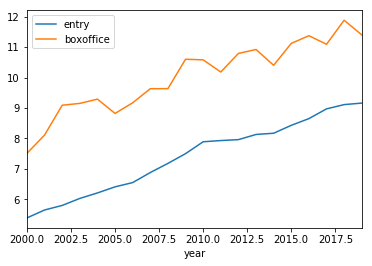

In [7]:
# the source of tickets avg price shows similar (but not exactly the same) value for the domestic box office
# in the next graph we normalize the values to compare entry price and boxoffice
# we can accept this value, since the graph displayed remain similar
us_entry.plot.line();

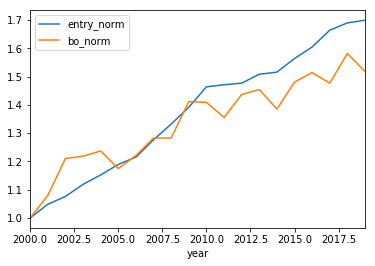

In [8]:
# set base of normalisation
entry_value_2000 = us_entry.iloc[0]["entry"]
bo_value_2000 = us_entry.iloc[0]["boxoffice"]

# add columns of values normalised
us_entry["entry_norm"] = us_entry["entry"].div(entry_value_2000)
us_entry["bo_norm"] = us_entry["boxoffice"].div(bo_value_2000)

# plot graph
us_entry[["entry_norm", "bo_norm"]].plot.line();

the increase of avg ticket value has sustained increased. 
the box office has also a postive trend, however the pace is more erratic
Overall the price entry increased 10 points more than the box-office
Therefore, we can infer: business is growing and at the same time, there is a loss of "customers"

### US Distributors
distinguish different sizes of Distributors, traditionally known as majors

In [9]:
file = "us_bo.csv"

us_bo = pd.read_csv(data + file)
us_bo = us_bo.drop(columns=["Unnamed: 0"])

In [10]:
us_bo.head()

,year,rank,release,gross,max_th,opening,open_th,open,close,distributor
0,2000,1,How the Grinch Stole Christmas,260044825,3256,55082330,3127,Nov 17,Mar 1,Universal Pictures
1,2000,2,Cast Away,233632142,3061,28883406,2774,Dec 22,-,Twentieth Century Fox
2,2000,3,Mission: Impossible II,215409889,3669,57845297,3653,May 24,Oct 19,Paramount Pictures
3,2000,4,Gladiator,187705427,3188,34819017,2938,May 5,May 10,DreamWorks Distribution
4,2000,5,What Women Want,182811707,3092,33614543,3012,Dec 15,-,Paramount Pictures


In [11]:
# group by distributors, study the majors
distributors = (us_bo.groupby("distributor").agg({"gross":"sum", "distributor":"count", "max_th":"mean", "opening": "mean"})
                                            .sort_values(by="gross", ascending=False))
distributors

,gross,distributor,max_th,opening
distributor,,,,
Walt Disney Studios Motion Pictures,34031229934,290,2716.182759,3.432690e+07
Warner Bros.,31142200566,491,2422.405295,1.916579e+07
Universal Pictures,24010314339,324,2744.882716,2.336190e+07
Twentieth Century Fox,22336405974,309,2938.025890,2.135673e+07
Sony Pictures Releasing,18360654772,281,2459.672598,1.892505e+07
...,...,...,...,...
Boll Films,1500,1,5.000000,1.500000e+03
Kathi Arts,1416,1,1.000000,1.042000e+03
Oilrag Productions,831,1,1.000000,8.310000e+02


In [12]:
# some massage of data
# grossing in millions
distributors["gross"] = distributors["gross"].div(million).round(3)
distributors["opening"] = distributors["opening"].div(million).round(3)
# avg max_th with 2 decimals
distributors["max_th"] = distributors["max_th"].round(2)

distributors

,gross,distributor,max_th,opening
distributor,,,,
Walt Disney Studios Motion Pictures,34031.230,290,2716.18,34.327
Warner Bros.,31142.201,491,2422.41,19.166
Universal Pictures,24010.314,324,2744.88,23.362
Twentieth Century Fox,22336.406,309,2938.03,21.357
Sony Pictures Releasing,18360.655,281,2459.67,18.925
...,...,...,...,...
Boll Films,0.002,1,5.00,0.002
Kathi Arts,0.001,1,1.00,0.001
Oilrag Productions,0.001,1,1.00,0.001


In [13]:
# rename columns
distributors = distributors.rename(columns={"distributor":"releases", "max_th":"avg_max_th", "opening":"avg_opening"})
distributors

,gross,releases,avg_max_th,avg_opening
distributor,,,,
Walt Disney Studios Motion Pictures,34031.230,290,2716.18,34.327
Warner Bros.,31142.201,491,2422.41,19.166
Universal Pictures,24010.314,324,2744.88,23.362
Twentieth Century Fox,22336.406,309,2938.03,21.357
Sony Pictures Releasing,18360.655,281,2459.67,18.925
...,...,...,...,...
Boll Films,0.002,1,5.00,0.002
Kathi Arts,0.001,1,1.00,0.001
Oilrag Productions,0.001,1,1.00,0.001


In [14]:
distributors["cumulative_contribution_gross"] = (distributors["gross"].cumsum()*100/distributors["gross"].sum()).round(2)

distributors["cumulative_contribution_releases"] = (distributors["releases"].cumsum()*100/distributors["releases"].sum()).round(2)

distributors.head(15)

,gross,releases,avg_max_th,avg_opening,cumulative_contribution_gross,cumulative_contribution_releases
distributor,,,,,,
Walt Disney Studios Motion Pictures,34031.230,290,2716.18,34.327,16.96,2.37
Warner Bros.,31142.201,491,2422.41,19.166,32.47,6.38
Universal Pictures,24010.314,324,2744.88,23.362,44.44,9.03
Twentieth Century Fox,22336.406,309,2938.03,21.357,55.57,11.56
Sony Pictures Releasing,18360.655,281,2459.67,18.925,64.72,13.86
Paramount Pictures,15188.916,231,2703.96,19.550,72.28,15.75
Lionsgate,9389.933,334,1591.99,9.783,76.96,18.48
DreamWorks,4730.766,39,3168.28,33.239,79.32,18.79
New Line Cinema,4356.796,92,2158.22,12.669,81.49,19.55


6 top distributors, known as majors, account for the 72% of the total gross in boxoffice with only with 15,75% of the releasese

without considering that other "independent" studios are also owned by majors (eg. Focus Features by Universal, Miramax by Disney or Fox Searchlight by 20th Century Fox)

In [15]:
# listing the majors
majors = ["Walt Disney Studios Motion Pictures", "Warner Bros.", "Universal Pictures", "Twentieth Century Fox", "Sony Pictures Releasing", "Paramount Pictures"]

In [16]:
us_bo["major"] = us_bo["distributor"].isin(majors)

us_bo

,year,rank,release,gross,max_th,opening,open_th,open,close,distributor,major
0,2000,1,How the Grinch Stole Christmas,260044825,3256,55082330,3127,Nov 17,Mar 1,Universal Pictures,True
1,2000,2,Cast Away,233632142,3061,28883406,2774,Dec 22,-,Twentieth Century Fox,True
2,2000,3,Mission: Impossible II,215409889,3669,57845297,3653,May 24,Oct 19,Paramount Pictures,True
3,2000,4,Gladiator,187705427,3188,34819017,2938,May 5,May 10,DreamWorks Distribution,False
4,2000,5,What Women Want,182811707,3092,33614543,3012,Dec 15,-,Paramount Pictures,True
...,...,...,...,...,...,...,...,...,...,...,...
12227,2019,784,Game Day,1624,4,1624,4,Oct 4,-,Ammo Content,False
12228,2019,785,American Playhouse: The Killing Floor,1583,1,1583,1,Nov 22,-,Film Movement,False
12229,2019,786,The Hours and Times,1273,1,1273,1,Mar 1,-,Oscilloscope,False
12230,2019,787,The Untold Story,790,1,790,1,Jan 18,-,Ammo Content,False


In [17]:
releases_y = us_bo.groupby("year").count()["release"]

releases_y_major = us_bo[us_bo["major"].eq(True)].groupby("year").count()["major"]

yearly_releases = pd.concat([releases_y, releases_y_major], axis=1)
yearly_releases

,release,major
year,,
2000,371,106
2001,356,98
2002,480,117
2003,506,93
2004,551,91
2005,547,99
2006,608,107
2007,632,87
2008,607,94


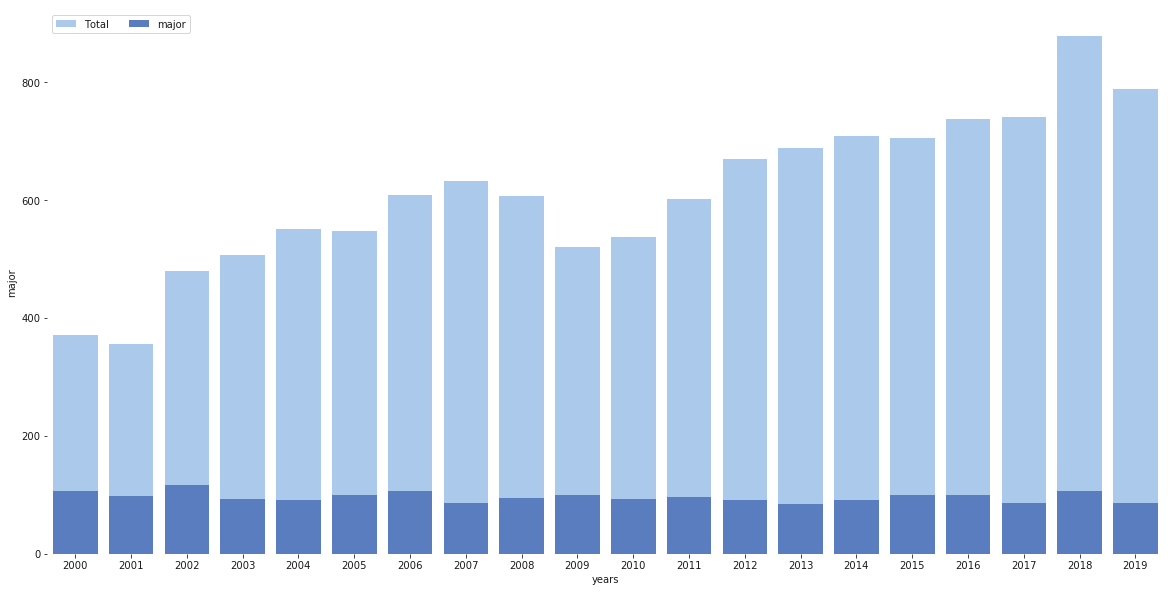

In [18]:
# add years as column
yearly_releases["years"] = yearly_releases.index
yearly_releases

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 10))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="years", y="release", data=yearly_releases,
            label="Total", color="b");

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="years", y="major", data=yearly_releases,
            label="major", color="b");

# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper left", frameon=True)

sns.despine(left=True, bottom=True)

the majors has kept the amount of titles released basically constant (around 100 per year) despite the total amount of releases has more than doubled

In [19]:
# percentage of major gross along years

major_gross_percent = us_bo[us_bo["major"].eq(True)].groupby("year").sum()["gross"]/us_bo.groupby("year").sum()["gross"]

no_major_gross_percent = 1 - major_gross_percent

gross_distribution = pd.concat([major_gross_percent, no_major_gross_percent], axis = 1)
# df.rename(columns={ df.columns[1]: "your value" }, inplace = True)
# rename columns
gross_distribution.columns = ["major", "independent"]

gross_distribution

,major,independent
year,,
2000,0.685675,0.314325
2001,0.640268,0.359732
2002,0.609562,0.390438
2003,0.662378,0.337622
2004,0.624414,0.375586
2005,0.682968,0.317032
2006,0.726364,0.273636
2007,0.617160,0.382840
2008,0.709524,0.290476


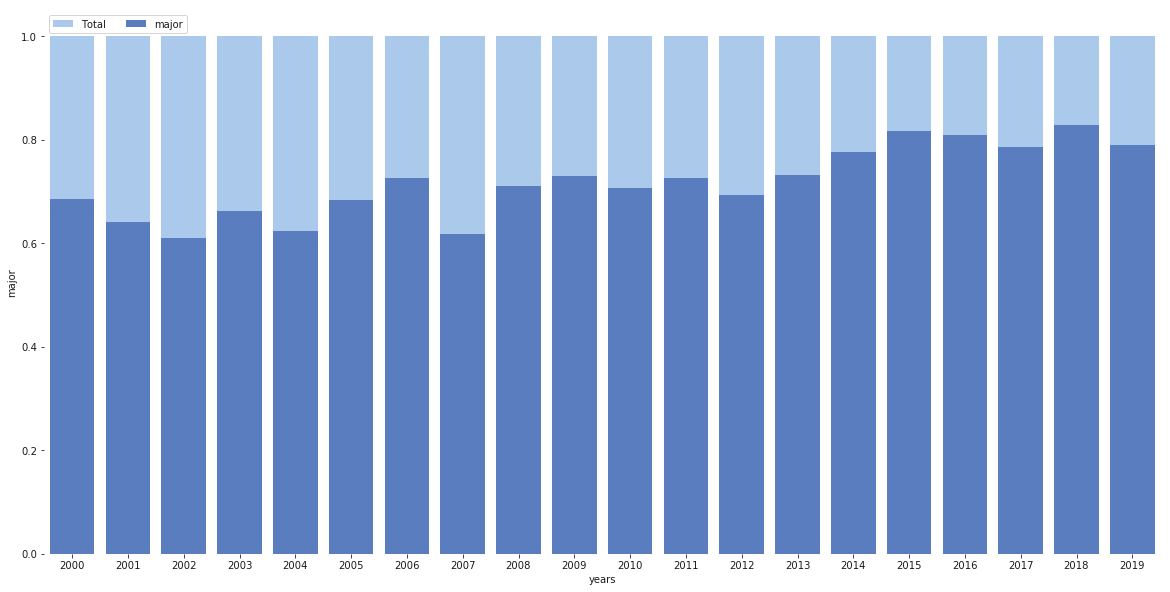

In [20]:
# add years as column
gross_distribution["years"] = gross_distribution.index


# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 10))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="years", y=1, data=gross_distribution,
            label="Total", color="b");

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="years", y="major", data=gross_distribution,
            label="major", color="b");

# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper left", frameon=True)
sns.despine(left=True, bottom=True)

Increasing the total boxoffice over a 45% and the amount of opening more than double, along the last 20 years, the majors increased their shared around 15 porcentual points (reaching around 80%) despite the number of releases stay steady.

we can infer a more extreme distribution of the movie's earnings, a few titles selling the most of entries and many titles with modest incomes. Tendency to disapear the "middle class"

### Blockbusters are outliers by definition

In [21]:
# take a look at the describe statistics
us_bo.describe().T

,count,mean,std,min,25%,50%,75%,max
year,12232.0,2.010628e+03,5.645064e+00,2000.0,2006.00,2011.0,2016.00,2019.0
rank,12232.0,3.200219e+02,1.981057e+02,1.0,153.00,306.0,470.00,878.0
gross,12232.0,1.640738e+07,4.896657e+07,30.0,30003.75,236993.5,5884612.75,936662225.0
max_th,12232.0,7.023571e+02,1.191300e+03,0.0,5.00,29.0,749.25,4802.0
opening,12232.0,4.753682e+06,1.522057e+07,0.0,5229.00,27813.5,669060.75,357115007.0
open_th,12232.0,6.253407e+02,1.177443e+03,0.0,1.00,5.0,312.25,4725.0


Some indications that the distribution is heavily bias

- We collected at total of 12.232 releases in the last 20 years
- the avg gross per movie is slightly over 16 Mio USD, however this is not representive at all of the most of the titles (50% of the movies made less than 237.000 USD in the boxoffice)
- By average a movie is released in 625 theatres, but 50% of the openings happen in only 5 theater or less. Only 25 % of the movies are released in more than 312 theatres

Let's see it with graphs

In [22]:
# we subset only movies over 1 Mio $ (around 1/3 of the theatrical releases)
us_bo_over_million = us_bo[["year", "gross", "major"]].loc[us_bo["gross"].ge(million)]

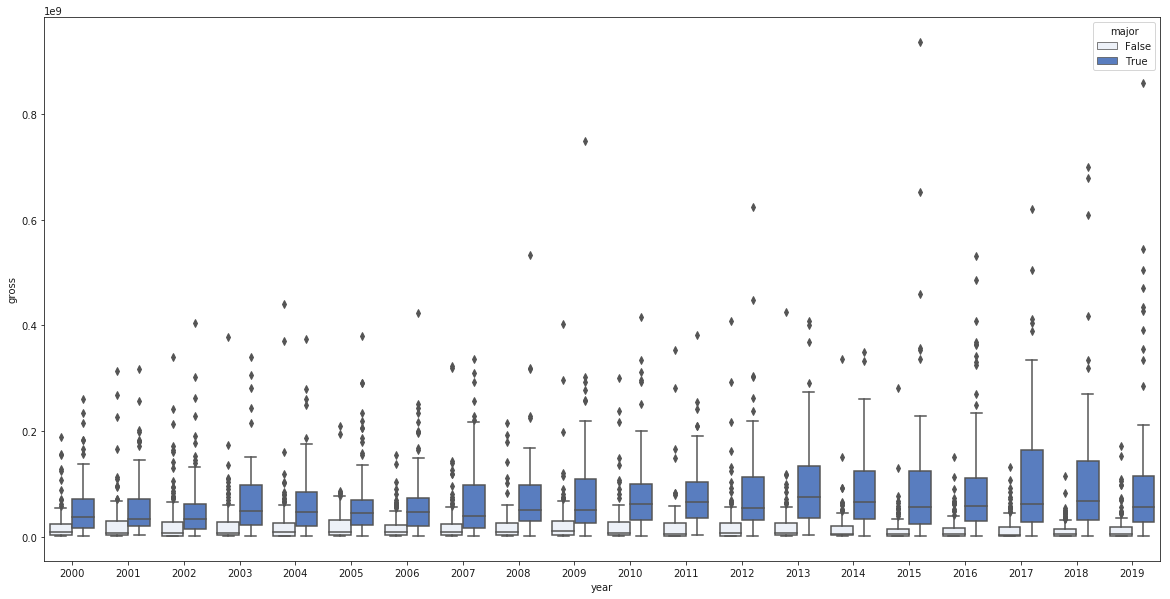

In [23]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 10))



sns.boxplot(x="year", y="gross",
              color="b", hue="major",
              data=us_bo_over_million);

We can see separting major and independent films, how is the evolution

- Blockbusters are always outliers (for both independent and major)but the difference between the success is increasing over the years, so the difference between the "box" (which include 50% of the releases)
- In the last 5 years there are no independent films capable to compete with the major's blockbusters (but early 200's the were aprox. in the same range)

### serializing the movies

Historically, always there were remakes and sequels in Hollywood, but we can verify how this evolved in the last 20 years in the following graph

In [24]:
file = "us_top20_originals.csv"
originals = pd.read_csv(data + file)
originals

,year,rank,distributor,major,original
0,2000,1,Universal Pictures,True,adaptation
1,2000,2,Twentieth Century Fox,True,original
2,2000,3,Paramount Pictures,True,sequel
3,2000,4,DreamWorks Distribution,False,original
4,2000,5,Paramount Pictures,True,original
...,...,...,...,...,...
395,2019,16,Universal Pictures,True,sequel
396,2019,17,Lionsgate,False,original
397,2019,18,Warner Bros.,True,adaptation
398,2019,19,Sony Pictures Releasing,True,original


we distinguish 4 categories

- original: created and/or relevant for the movie
- adaptation: adaptation of succesful previous media (book - bestseller, comic, video-game,...)
- remake: re-creation of a previous successful film
- sequel: continuation of a serie of movies

In [25]:
originals["original"].value_counts()

original      159
sequel        141
adaptation     77
remake         23
Name: original, dtype: int64

In [26]:
original_dict = {"original":0, "adaptation":1, "remake":2, "sequel":3}
originals_value = originals[["rank", "year", "original"]].replace({"original":original_dict})
originals_value

,rank,year,original
0,1,2000,1
1,2,2000,0
2,3,2000,3
3,4,2000,0
4,5,2000,0
...,...,...,...
395,16,2019,3
396,17,2019,0
397,18,2019,1
398,19,2019,0


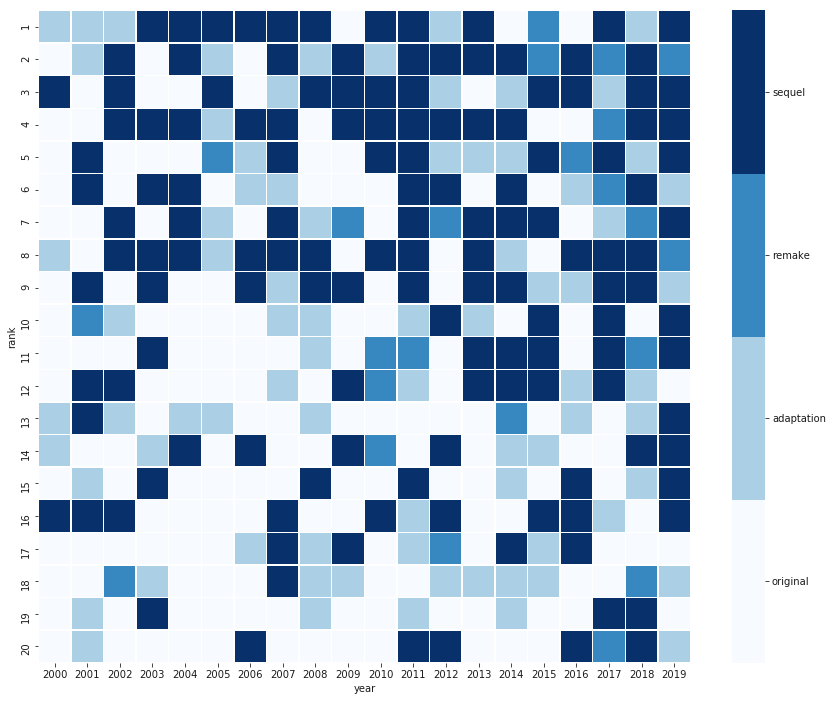

In [27]:

# create a pivot table for heatmap
originals_heatmap = pd.pivot_table(originals_value, values="original", index="rank", columns="year")

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(15, 12))


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(originals_heatmap,
            cmap=plt.cm.get_cmap('Blues', 4), 
            #cbar = False,
            square=True, 
            linewidths=.5);

colorbar = ax.collections[0].colorbar
r = colorbar.vmax - colorbar.vmin
colorbar.set_ticks([colorbar.vmin + r / 4 * (0.5 + i) for i in range(4)])
colorbar.set_ticklabels(list(original_dict.keys()))

Along the last 20 years, we see how the sequels and remakes are taking over the top positions of the boxoffice in US

In [28]:
us_bo

,year,rank,release,gross,max_th,opening,open_th,open,close,distributor,major
0,2000,1,How the Grinch Stole Christmas,260044825,3256,55082330,3127,Nov 17,Mar 1,Universal Pictures,True
1,2000,2,Cast Away,233632142,3061,28883406,2774,Dec 22,-,Twentieth Century Fox,True
2,2000,3,Mission: Impossible II,215409889,3669,57845297,3653,May 24,Oct 19,Paramount Pictures,True
3,2000,4,Gladiator,187705427,3188,34819017,2938,May 5,May 10,DreamWorks Distribution,False
4,2000,5,What Women Want,182811707,3092,33614543,3012,Dec 15,-,Paramount Pictures,True
...,...,...,...,...,...,...,...,...,...,...,...
12227,2019,784,Game Day,1624,4,1624,4,Oct 4,-,Ammo Content,False
12228,2019,785,American Playhouse: The Killing Floor,1583,1,1583,1,Nov 22,-,Film Movement,False
12229,2019,786,The Hours and Times,1273,1,1273,1,Mar 1,-,Oscilloscope,False
12230,2019,787,The Untold Story,790,1,790,1,Jan 18,-,Ammo Content,False


In [29]:
us_bo_scatter = (us_bo.groupby(["year","distributor"])
                      .agg({"gross":"sum","release":"count", "max_th":"mean"})
                      .reset_index()
                      .rename(columns={"max_th":"avg_max_th", "release":"releases"}))

us_bo_scatter["studio"] = us_bo_scatter["distributor"].isin(majors)
studio_dict ={True:"major", False:"independent"}
#us_bo_scatter = us_bo_scatter["studio"].replace({"studio":studio_dict})

In [30]:
us_bo_scatter

,year,distributor,gross,releases,avg_max_th,studio
0,2000,-,32720658,25,39.480000,False
1,2000,Alliance Atlantis Vivafilm,254380,1,9.000000,False
2,2000,Arrow Releasing,18154,1,0.000000,False
3,2000,Artisan Entertainment,73550960,8,1049.750000,False
4,2000,Artistic License,488366,3,3.666667,False
...,...,...,...,...,...,...
2149,2019,Walt Disney Studios Motion Pictures,3829249937,10,4156.500000,True
2150,2019,Warner Bros.,1396752617,26,2389.230769,True
2151,2019,Well Go USA Entertainment,13784460,21,46.190476,False
2152,2019,Yellow Veil Pictures,15849,1,6.000000,False


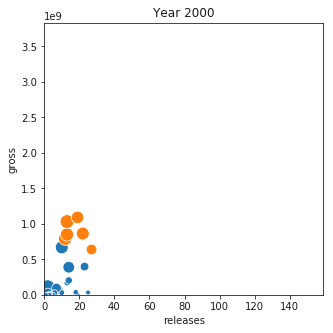

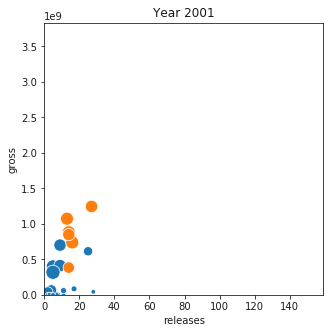

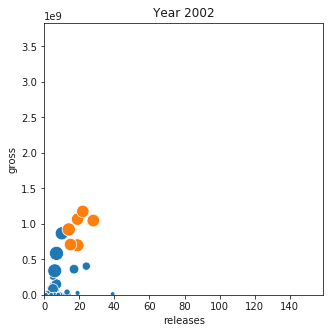

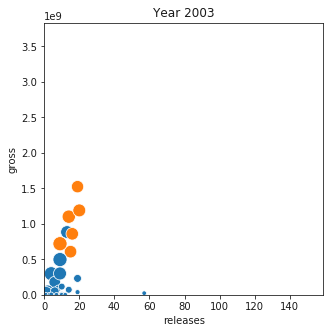

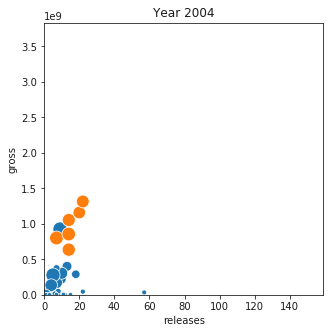

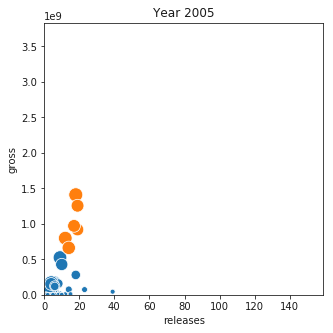

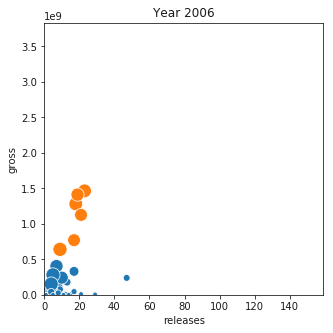

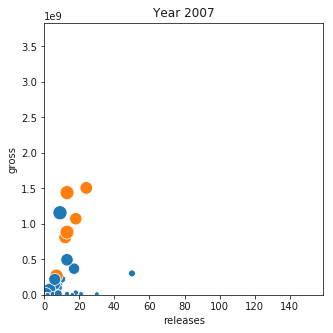

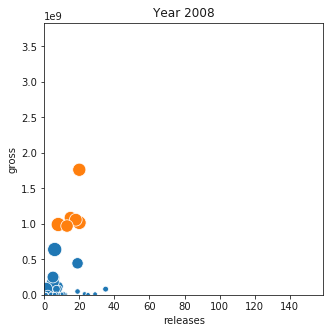

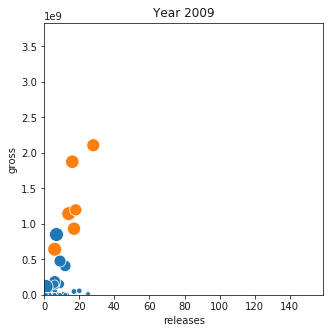

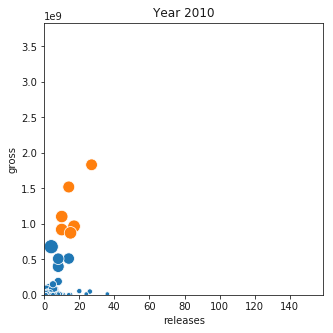

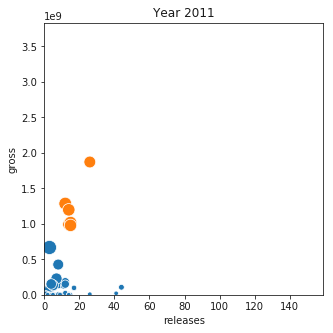

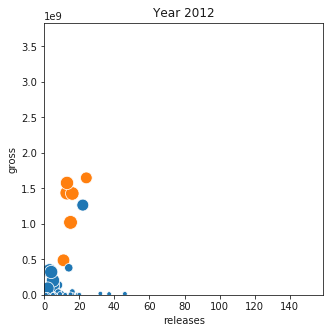

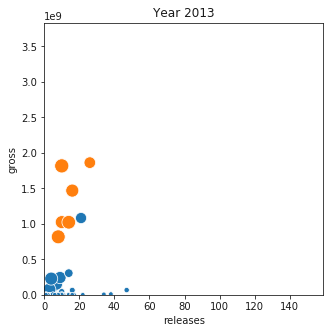

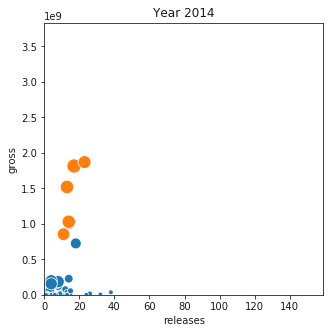

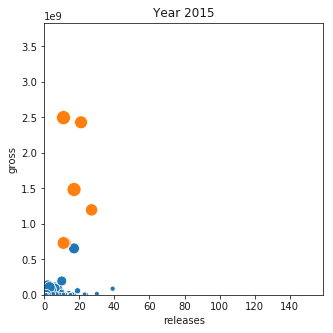

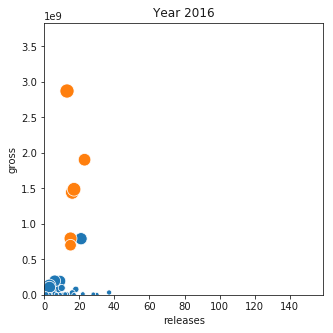

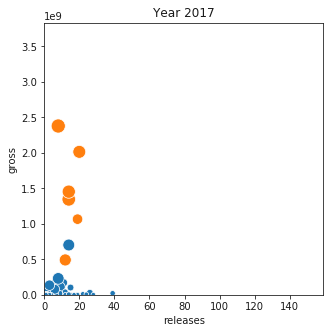

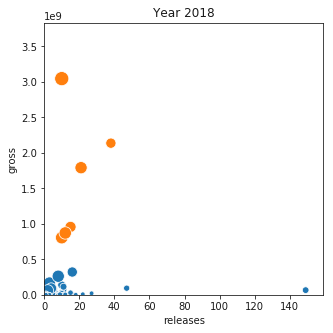

In [31]:
for i in range(2000,2019):
    fig, ax = plt.subplots(figsize=(5, 5))
    ax = sns.scatterplot(x="releases",
                         y="gross",
                         size="avg_max_th",
                         sizes=(20,200),
                         hue="studio",
                         data=us_bo_scatter[us_bo_scatter["year"].eq(i)],
                         legend=False)
    ax.set_title(f"Year {i}")
    # control x and y limits
    ax.set_ylim(0, us_bo_scatter["gross"].max())
    ax.set_xlim(0, us_bo_scatter["releases"].max()+10);

In the evolution along the years, we scan see how the majors(orange) are separating from the independents, carrying and taking over total control of the boxoffice

However, in tha last years we can see also other business model: the distributors with more yearly releases are some independent focus in niche and events concept